# Part 1B

# Contents


### 1. Import libraries
### 2. Import data
### 3. Create a profiling variable
### 4. Create visualization of customer profile
### 5. Aggregate max, mean, min for customer profile level usage frequency & expenditure
### 6. Compare customer profiles with regions and departments
### 7. Export charts to csv charts

In [1]:
# Import libaries

import pandas as pd
import numpy as np
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import data

In [2]:
path = r'C:\Documents\Career Foundry\Python\Instacart Basket Analysis'

In [3]:
# Import dataset

dfm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'dfmFinal2.pkl'))

In [4]:
dfm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,fam_status,income,region,parent,parent_spending_power,parent_age,parent_income_profile,has_children,shops_baby_aisle,avg_inc_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income


In [5]:
pd.options.display.max_columns = None

In [6]:
pd.options.display.max_rows = None

In [173]:
# lower the amount of memory numeric columns use
def lm(dfm):

    fcols = dfm.select_dtypes('float').columns
    icols = dfm.select_dtypes('integer').columns

    dfm[fcols] = dfm[fcols].apply(pd.to_numeric, downcast='float')
    dfm[icols] = dfm[icols].apply(pd.to_numeric, downcast='integer')
    
    return dfm

## 3. Create a profiling variable

### Create 'has_children' variable - 'not_parent', 'parent'

In [51]:
dfm.loc[dfm['dependants'] == 0, 'has_children'] = "not_parent"

In [52]:
dfm.loc[dfm['dependants'] > 0, 'has_children'] = "parent"

In [8]:
dfm['has_children'].value_counts(dropna = False)

parent        23223512
not_parent     7739273
Name: has_children, dtype: int64

### Create 'shops_baby_aisle' variable - 'shops_baby', 'doesn't_shop_baby'

In [ ]:
# 'shops_baby_aisle' criteria -
#'department_id' = 2 (Baby's Vitamin D3, Kids Multivitaim, Primadophilus for Children) or 
# 18 (Diapers, Baby Wipes, Baby Food)

In [50]:
dfm.loc[(dfm['department_id'] != 2) | (dfm['department_id'] != 18), "shops_baby_aisle"] = "doesn't_shop_baby"

In [52]:
dfm.loc[(dfm['department_id'] == 2), 'shops_baby_aisle'] = 'shops_baby'

In [54]:
dfm.loc[(dfm['department_id'] == 18), 'shops_baby_aisle'] = 'shops_baby'

In [55]:
dfm['shops_baby_aisle'].value_counts(dropna = False)

doesn't_shop_baby    30517982
shops_baby             444803
Name: shops_baby_aisle, dtype: int64

### Create 'parents' variable - 'not_parent', 'parent_no_baby', 'with baby'

In [66]:
dfm.loc[dfm['dependants'] == 0, 'parent'] = "not_parent"

In [67]:
dfm.loc[(dfm['dependants'] > 0) & (dfm['shops_baby_aisle'] == 'shops_baby'), 'parent'] = 'with_baby'

In [68]:
dfm.loc[(dfm['dependants'] > 0) & (dfm['shops_baby_aisle'] == "doesn't_shop_baby"), 'parent'] = 'parent_no_baby'

In [69]:
dfm['parent'].value_counts(dropna = False)

parent_no_baby    22890751
not_parent         7739273
with_baby           332761
Name: parent, dtype: int64

In [75]:
dfm.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,parent,parent_spending_power,parent_age,parent_income_profile,has_children,shops_baby_aisle
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_high_spending_power,parent,doesn't_shop_baby


### Create 'parent_age' variable


In [44]:
# 'not parent' criteria -
# dependants == 0

dfm.loc[dfm['dependants'] == 0, 'parent_age'] = "not_parent"

In [45]:
# younger_parent criteria - 
# dependants > 0
# Age =< 30

dfm.loc[(dfm['dependants'] > 0) & (dfm['Age'] <= 30), 'parent_age'] = 'younger_parent'

In [46]:
# 'older_parent' criteria -
# dependants > 0
# Age > 30

dfm.loc[(dfm['dependants'] > 0) & (dfm['Age'] > 30), 'parent_age'] = 'older_parent'

In [5]:
dfm['parent_age'].value_counts(dropna = False)

older_parent      18492909
not_parent         7739273
younger_parent     4730603
Name: parent_age, dtype: int64

Instacart's largest parent/age demographic is a parent who is over 30

### Create avg_inc_flag

#### Find average income of customers

In [159]:
# Create a temp df that doesn't have duplicates of 'user_id'

dftemp = dfm.drop_duplicates(['user_id'])

In [161]:
dftemp.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,parent,parent_spending_power,parent_age,parent_income_profile,has_children,shops_baby_aisle
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby
10,2968173,15,15,1,9,7.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,22,Regular customer,3.980556,Low spender,10.416667,Regular customer,Janet,Woodard,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,not_parent,not_parent,not_parent,no_children_low_spending,not_parent,doesn't_shop_baby
15,2293453,19,2,5,14,6.0,196,3,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Most orders,9,New customer,8.372059,Low spender,6.779412,Frequent customer,Jane,Salazar,Female,Louisiana,62,2/3/2017,1,married,151988,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby
18,1573906,21,10,3,10,6.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,33,Regular customer,7.012683,Low spender,9.809756,Frequent customer,Edward,Carr,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,West,not_parent,not_parent,not_parent,no_children_low_spending,not_parent,doesn't_shop_baby
19,1593000,31,10,3,8,7.0,196,17,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,20,Regular customer,8.137793,Low spender,5.809364,Frequent customer,Sara,Mckenzie,Female,Oklahoma,38,1/22/2019,1,married,52311,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby


In [162]:
avg_inc = []

In [163]:
avg_inc = dftemp['income'].mean()

In [164]:
avg_inc

95686.30823956219

### create avg_inc_flag column

In [168]:
dfm.loc[dfm['income'] > 95686, 'avg_inc_flag'] = 'higher_income'

In [170]:
dfm.loc[dfm['income'] <= 95686, 'avg_inc_flag'] = 'lower_income'

In [171]:
dfm.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,parent,parent_spending_power,parent_age,parent_income_profile,has_children,shops_baby_aisle,avg_inc_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_spending,parent,doesn't_shop_baby,lower_income


### Create 'parent_income_profile' variable - Is customer high or low spending and are they a parent, and if so, with a baby

In [175]:
# 'no_children_low_income' criteria - 
     # dependants == 0 & 'lower_income'
    
dfm.loc[(dfm['dependants'] == 0) & (dfm['avg_inc_flag'] == 'lower_income'), 'parent_income_profile'] = 'no_children_low_income'

In [176]:
# 'parent_low_income' criteria - 
    # 'parent' = 'parent_no_baby' and 'lower_income'

dfm.loc[(dfm['parent'] == 'parent_no_baby') & (dfm['avg_inc_flag'] == 'lower_income'), 'parent_income_profile'] = 'parent_low_income'

In [177]:
# 'parent_w_baby_low_income' criteria - 
    # 'parent' = 'with_baby' and 'lower_income'

dfm.loc[(dfm['parent'] == 'with_baby') & (dfm['avg_inc_flag'] == 'lower_income'), 'parent_income_profile'] = 'parent_w_baby_low_income'

In [178]:
# 'no_children_high_income' criteria - 
     # dependants == 0 & 'higher_spending' 

dfm.loc[(dfm['dependants'] == 0) & (dfm['avg_inc_flag'] == 'higher_income'), 'parent_income_profile'] = 'no_children_high_income'

In [179]:
# 'parent_higher_income' criteria - 
    # 'parent' = 'parent_no_baby' and 'higher_income'

dfm.loc[(dfm['parent'] == 'parent_no_baby') & (dfm['avg_inc_flag'] == 'higher_income'), 'parent_income_profile'] = 'parent_higher_income'

In [180]:
# 'parent_w_baby_high_income' criteria - 
    # 'parent' = 'with_baby' and 'higher income'
    
dfm.loc[(dfm['parent'] == 'with_baby') & (dfm['avg_inc_flag'] == 'higher_income'), 'parent_income_profile'] = 'parent_w_baby_high_income'

In [181]:
dfm['parent_income_profile'].value_counts(dropna = False)

parent_higher_income         11739187
parent_low_income            11151564
no_children_high_income       3996184
no_children_low_income        3743089
parent_w_baby_high_income      179967
parent_w_baby_low_income       152794
Name: parent_income_profile, dtype: int64

Since parents with an income above average and parents with an income lower than average order significantly more than customers with a baby or no children, children may be doing some of the ordering

## 4. Create visualization of customer profile

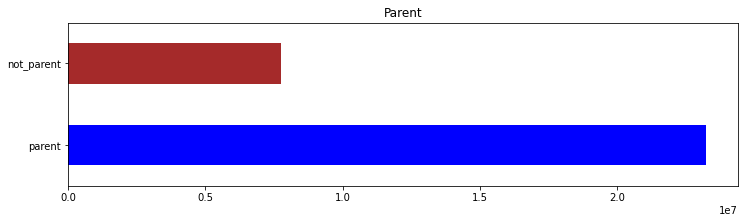

In [142]:
# Create bar chart using 'has_children' column

bar_children = dfm['has_children'].value_counts().plot(kind='barh', figsize=(12, 3), title='Parent', color = ['blue', 'brown'])

In [97]:
# Export bar chart

bar_children.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Final Project', 'bar_children.png'))

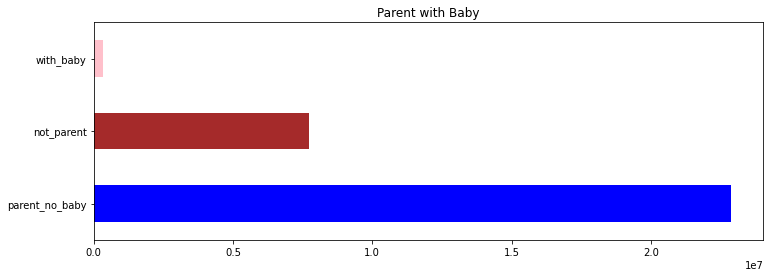

In [99]:
# Create bar chart using 'parent' column

bar = dfm['parent'].value_counts().plot(kind='barh', figsize=(12, 4), title='Parent with Baby', color = ['blue', 'brown', 'pink'])

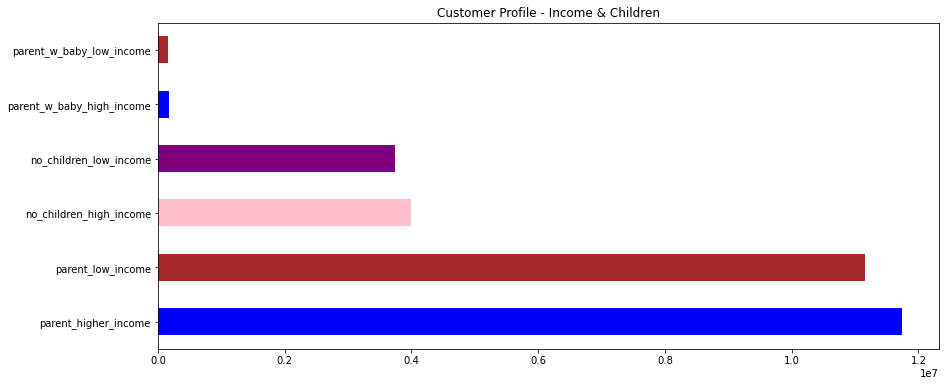

In [185]:
# Create bar chart using 'parent_income_profile' column

barProf = dfm['parent_income_profile'].value_counts().plot(kind='barh', figsize=(14, 6), title='Customer Profile - Income & Children', color = ['blue', 'brown', 'pink', 'purple'])

In [186]:
dfm['parent_income_profile'].value_counts(dropna=False)

parent_higher_income         11739187
parent_low_income            11151564
no_children_high_income       3996184
no_children_low_income        3743089
parent_w_baby_high_income      179967
parent_w_baby_low_income       152794
Name: parent_income_profile, dtype: int64

In [21]:
# Export bar chart

barProf.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Final Project', 'barProf.png'))

NameError: name 'barProf' is not defined

## 5. Aggregate max, mean, min for customer profile level usage frequency & expenditure

In [15]:
dfm.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_price_mean,spending_flag,med_days_since,Order freq,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,region,parent,parent_spending_power,parent_age,parent_income_profile,has_children,shops_baby_aisle,avg_inc_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367796,Low spender,18.542374,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,parent_no_baby,high_spending,older_parent,parent_low_income,parent,doesn't_shop_baby,lower_income


In [57]:
# Aggregate people with and without children by how often they order

dfm.groupby('has_children').agg({'med_days_since':['max','min','mean']})

med_days_since                
                        max  min       mean
has_children                               
not_parent        28.972973  0.0  10.213575
parent            29.333334  0.0  10.235936

There is virtually no difference in ordering frequency between customers with and without children

In [58]:
# Aggregate people with and without children by how much they spend

dfm.groupby('has_children').agg({'user_price_mean':['max','min','mean']})

user_price_mean                
                         max  min       mean
has_children                                
not_parent      15006.940430  1.0  12.102987
parent          10209.987305  1.0  11.877516

There is virtually no difference in the amount spent between customers with and without children

In [191]:
# Aggregate people by parent and income profile by how often they order

dfsave = dfm.groupby('parent_income_profile').agg({'med_days_since':['max','min','mean']})

In [192]:
dfsave

med_days_since                     
                                     max       min       mean
parent_income_profile                                        
no_children_high_income        28.620689  0.000000  10.143066
no_children_low_income         28.972973  0.000000  10.288852
parent_higher_income           29.333334  0.196078  10.234447
parent_low_income              29.142857  0.000000  10.263180
parent_w_baby_high_income      29.154930  0.300546   9.364922
parent_w_baby_low_income       28.813953  0.000000   9.387820

In [196]:
dfsave.to_clipboard()

Parents with babies order more frequently

In [194]:
# Aggregate people by parent and income profile by how much they spend

dfsave = dfm.groupby('parent_income_profile').agg({'user_price_mean':['max','min','mean']})

In [195]:
dfsave

user_price_mean                     
                                      max       min       mean
parent_income_profile                                         
no_children_high_income      15006.940430  7.000000  16.114964
no_children_low_income        3453.431152  1.000000   7.819735
parent_higher_income         10209.987305  7.000000  15.539671
parent_low_income             3402.921387  1.000000   8.054130
parent_w_baby_high_income     3695.987793  7.000373  13.235078
parent_w_baby_low_income      1102.707642  1.425000   7.961720

Parents with low income and a baby spend much less at Instacart than parents

## 6. Compare customer profiles with regions and departments
## 7. Export charts to csv charts

In [12]:
# Compare regions with parents

comp_region_parent = pd.crosstab(dfm['region'], dfm['has_children'])

In [13]:
comp_region_parent

has_children,not_parent,parent
region,,
Midwest,1822703,5438423
Northeast,1354400,4109985
South,2581808,7728697
West,1980362,5946407


In [14]:
comp_region_parent.to_clipboard()

In [200]:
# Compare product departments with parents

comp_dept_parent = pd.crosstab(dfm['department_id'], dfm['has_children'])

In [201]:
comp_dept_parent

has_children,not_parent,parent
department_id,,
1,529348,1592383
2,8714,25697
3,281395,839433
4,2275440,6803832
5,36827,107800
6,64461,191530
7,645339,1926560
8,23602,69458
9,204296,617840


In [12]:
comp_dept_parent.to_clipboard()

0

In [18]:
# Compare order frequency by time of day with parent_income_profile

comp_order_frequency_hour_parent_income_profile = pd.crosstab(dfm['order_hour_of_day'], dfm['parent_income_profile'], dropna = True)

In [19]:
comp_order_frequency_hour_parent_income_profile


parent_income_profile,no_children_high_income,no_children_low_income,parent_higher_income,parent_low_income,parent_w_baby_high_income,parent_w_baby_low_income
order_hour_of_day,,,,,,
0,26171,25262,79036,75522,1114,925
1,13147,13581,42135,39833,472,442
2,9022,7709,23880,24552,247,272
3,6677,5697,17516,18501,199,201
4,6133,6071,20168,17931,241,215
5,11227,10056,32672,29623,447,386
6,36808,34062,106699,99486,2075,1871
7,114332,105737,330398,299956,6998,5755
8,215422,200507,629522,591270,12209,10102


In [20]:
comp_order_frequency_hour_parent_income_profile.to_clipboard()

In [8]:
# Compare order frequency by day of the week with parent_income_profile

comp_order_frequency_parent_income_profile = pd.crosstab(dfm['orders_day_of_week'], dfm['parent_income_profile'], dropna = True)

In [9]:
comp_order_frequency_parent_income_profile

parent_income_profile,no_children_high_income,no_children_low_income,parent_higher_income,parent_low_income,parent_w_baby_high_income,parent_w_baby_low_income
orders_day_of_week,,,,,,
0,776781,700264,2295215,2073318,33859,28978
1,688540,673718,2004575,1987557,31005,25908
2,511888,490629,1503539,1473491,24221,20674
3,471373,445604,1376580,1334623,21977,19129
4,460752,444441,1361934,1316976,22169,18435
5,523544,490560,1510902,1467453,21762,19218
6,563306,497873,1686442,1498146,24974,20452


In [16]:
# Compare regions with parent_income_profile

comp_region_parent_income_profile = pd.crosstab(dfm['region'], dfm['parent_income_profile'], dropna = True)

In [11]:
comp_order_frequency_parent_income_profile.to_clipboard()

In [17]:
comp_region_parent_income_profile

parent_income_profile,no_children_high_income,no_children_low_income,parent_higher_income,parent_low_income,parent_w_baby_high_income,parent_w_baby_low_income
region,,,,,,
Midwest,956563,866140,2794179,2567177,41764,35303
Northeast,683311,671089,2104193,1946467,32099,27226
South,1321751,1260057,3845180,3770665,60923,51929
West,1034559,945803,2995635,2867255,45181,38336


In [10]:
comp_region_parent_income_profile.to_clipboard()

In [18]:
# Compare dept with parent_income_profile

comp_dept_parent_income_profile = pd.crosstab(dfm['department_id'], dfm['parent_income_profile'], dropna = True)

In [19]:
comp_dept_parent_income_profile

parent_income_profile,no_children_high_income,no_children_low_income,parent_higher_income,parent_low_income,parent_w_baby_high_income,parent_w_baby_low_income
department_id,,,,,,
1,277137,252211,827606,764777,0,0
2,4448,4266,0,0,13253,12444
3,148808,132587,441263,398170,0,0
4,1197510,1077930,3553533,3250299,0,0
5,20212,16615,56476,51324,0,0
6,34256,30205,100742,90788,0,0
7,317714,327625,942783,983777,0,0
8,13246,10356,36891,32567,0,0
9,109522,94774,330994,286846,0,0


In [208]:
comp_dept_parent_income_profile.to_clipboard()

In [210]:
dfm.to_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'dfmFinal2.pkl'))